# Lab 3

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.python.ops.numpy_ops.np_config as np_config
np_config.enable_numpy_behavior()

## Analisis Exploratorio

## Red neuronal

In [2]:
(d_train, d_test), d_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [5]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

d_train = d_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
d_train = d_train.cache()
d_train = d_train.shuffle(d_info.splits['train'].num_examples)
d_train = d_train.batch(128)
d_train = d_train.prefetch(tf.data.experimental.AUTOTUNE)

In [7]:
d_test = d_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
d_test = d_test.batch(128)
d_test = d_test.cache()
d_test = d_test.prefetch(tf.data.experimental.AUTOTUNE)

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    d_train,
    epochs=6,
    validation_data=d_test,
)

Epoch 1/6
469/469 [==============================] - 7s 4ms/step - loss: 1.7993 - sparse_categorical_accuracy: 0.5813 - val_loss: 35.0359 - val_sparse_categorical_accuracy: 0.6500
Epoch 2/6
469/469 [==============================] - 1s 3ms/step - loss: 0.8861 - sparse_categorical_accuracy: 0.8051 - val_loss: 40.1506 - val_sparse_categorical_accuracy: 0.7474
Epoch 3/6
469/469 [==============================] - 2s 3ms/step - loss: 0.5933 - sparse_categorical_accuracy: 0.8561 - val_loss: 50.4161 - val_sparse_categorical_accuracy: 0.7509
Epoch 4/6
469/469 [==============================] - 2s 4ms/step - loss: 0.4738 - sparse_categorical_accuracy: 0.8787 - val_loss: 56.0454 - val_sparse_categorical_accuracy: 0.7564
Epoch 5/6
469/469 [==============================] - 2s 4ms/step - loss: 0.4123 - sparse_categorical_accuracy: 0.8903 - val_loss: 59.7453 - val_sparse_categorical_accuracy: 0.7636
Epoch 6/6
469/469 [==============================] - 2s 3ms/step - loss: 0.3761 - sparse_categorical

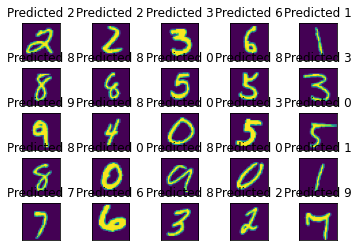

In [11]:
for (index, (img, label)) in enumerate(d_test):
  if (index<25):
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[0].reshape(28,28))
    pred = np.argmax(model.predict(img)[0])
    plt.title('Predicted {}'.format(pred))
  else:
    break
plt.show()

## Deep Learning

In [12]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# TFDS da las imágenes como tf.uint8, pero que el modelo espera tf.float32.
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [13]:
print(ds_train)

<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


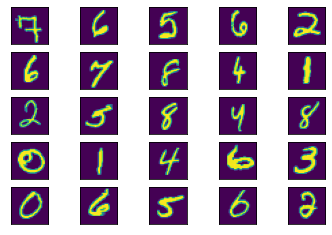

In [14]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(list(ds_train)[0][0][i].reshape(28,28))
plt.show()

In [15]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(28,(1,1), activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10),
])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        56        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5488)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               702592    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 703,938
Trainable params: 703,938
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

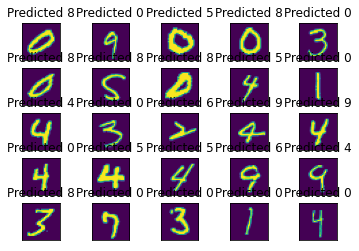

In [19]:
for (index, (img, label)) in enumerate(ds_train):
  if (index<25):
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[0].reshape(28,28))
    pred = np.argmax(model.predict(img)[0])
    plt.title('Predicted {}'.format(pred))
  else:
    break
plt.show()

In [20]:
history = model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 13s 27ms/step - loss: 0.3759 - sparse_categorical_accuracy: 0.8910 - val_loss: 0.2281 - val_sparse_categorical_accuracy: 0.9289
Epoch 2/6
469/469 [==============================] - 13s 27ms/step - loss: 0.1988 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.1645 - val_sparse_categorical_accuracy: 0.9504
Epoch 3/6
469/469 [==============================] - 14s 30ms/step - loss: 0.1457 - sparse_categorical_accuracy: 0.9553 - val_loss: 0.1290 - val_sparse_categorical_accuracy: 0.9610
Epoch 4/6
469/469 [==============================] - 15s 31ms/step - loss: 0.1159 - sparse_categorical_accuracy: 0.9641 - val_loss: 0.1234 - val_sparse_categorical_accuracy: 0.9640
Epoch 5/6
469/469 [==============================] - 15s 32ms/step - loss: 0.0953 - sparse_categorical_accuracy: 0.9705 - val_loss: 0.1142 - val_sparse_categorical_accuracy: 0.9655
Epoch 6/6
469/469 [==============================] - 18s 37ms/step - loss: 0.0825 - sparse_cate

In [21]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


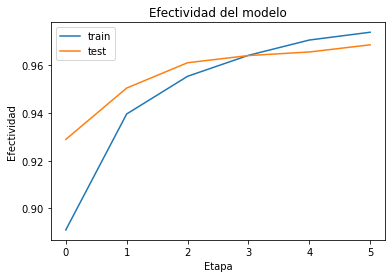

In [22]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Efectividad del modelo')
plt.ylabel('Efectividad')
plt.xlabel('Etapa')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



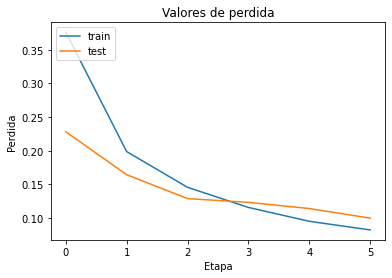

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Valores de perdida')
plt.ylabel('Perdida')
plt.xlabel('Etapa')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

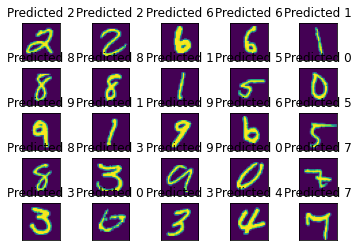

In [24]:
for (index, (img, label)) in enumerate(ds_test):
  if (index<25):
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[0].reshape(28,28))
    pred = np.argmax(model.predict(img)[0])
    plt.title('Predicted {}'.format(pred))
  else:
    break
plt.show()

## KNN